<a href="https://colab.research.google.com/github/jjkind/colab-rnn/blob/main/Linear_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
try:
  %tensorflow_version 2.x #colab only
except Exception:
  pass

import tensorflow as tf
print(tf.__version__)

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
2.13.0


In [3]:
# load in the data
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()


In [9]:
data.data.shape

(569, 30)

569 is the number of samples and 30 is number of features N = number of samples, D = number of features

In [10]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

This tells us that we have 2 target classes

In [11]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

data.target_names tells you the labels on your data

In [4]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.33)

N, D = X_train.shape

In [8]:
N, D = X_train.shape

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
model = tf.keras.models.Sequential([tf.keras.layers.Input(shape=(D,)), tf.keras.layers.Dense(1, activation='sigmoid')])

Alternative way => create model and then add layers
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(1, input_shape=(D,), activation='sigmoid'))

In [15]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [16]:
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

Epoch 1/100
12/12 [==============================] - 2s 23ms/step - loss: 1.5440 - accuracy: 0.2703 - val_loss: 1.5889 - val_accuracy: 0.2606
Epoch 2/100
12/12 [==============================] - 0s 7ms/step - loss: 1.4180 - accuracy: 0.3045 - val_loss: 1.4561 - val_accuracy: 0.2926
Epoch 3/100
12/12 [==============================] - 0s 5ms/step - loss: 1.2960 - accuracy: 0.3281 - val_loss: 1.3310 - val_accuracy: 0.3085
Epoch 4/100
12/12 [==============================] - 0s 4ms/step - loss: 1.1792 - accuracy: 0.3622 - val_loss: 1.2157 - val_accuracy: 0.3457
Epoch 5/100
12/12 [==============================] - 0s 4ms/step - loss: 1.0758 - accuracy: 0.4016 - val_loss: 1.1049 - val_accuracy: 0.3723
Epoch 6/100
12/12 [==============================] - 0s 6ms/step - loss: 0.9748 - accuracy: 0.4698 - val_loss: 1.0063 - val_accuracy: 0.4096
Epoch 7/100
12/12 [==============================] - 0s 4ms/step - loss: 0.8891 - accuracy: 0.4908 - val_loss: 0.9138 - val_accuracy: 0.4521
Epoch 8/100


In [18]:
print("Train score:", model.evaluate(X_train, y_train))
print("Test score:", model.evaluate(X_test, y_test))

12/12 [==============================] - 0s 2ms/step - loss: 0.0979 - accuracy: 0.9738
Train score: [0.0979473665356636, 0.9737532734870911]
6/6 [==============================] - 0s 3ms/step - loss: 0.1424 - accuracy: 0.9574
Test score: [0.14241811633110046, 0.957446813583374]


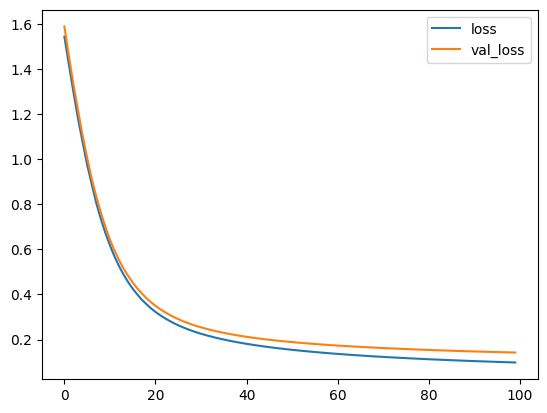

In [19]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend();

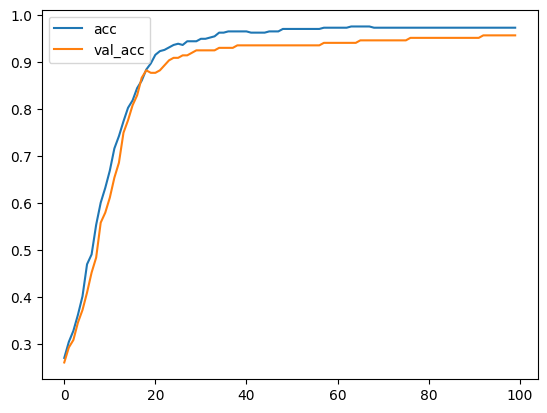

In [20]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend();